In [52]:
from utils.json_utils import *

data = load_json("/home/guest-pjy/data/source/hotpot_dev_distractor_v1.json")
new_data_path = (
    "/home/guest-pjy/data/0830/hotpot_dev_distractor_preprocessed.json"
)

In [53]:
data[0]

{'_id': '5a8b57f25542995d1e6f1371',
 'answer': 'yes',
 'question': 'Were Scott Derrickson and Ed Wood of the same nationality?',
 'supporting_facts': [['Scott Derrickson', 0], ['Ed Wood', 0]],
 'context': [['Ed Wood (film)',
   ['Ed Wood is a 1994 American biographical period comedy-drama film directed and produced by Tim Burton, and starring Johnny Depp as cult filmmaker Ed Wood.',
    " The film concerns the period in Wood's life when he made his best-known films as well as his relationship with actor Bela Lugosi, played by Martin Landau.",
    ' Sarah Jessica Parker, Patricia Arquette, Jeffrey Jones, Lisa Marie, and Bill Murray are among the supporting cast.']],
  ['Scott Derrickson',
   ['Scott Derrickson (born July 16, 1966) is an American director, screenwriter and producer.',
    ' He lives in Los Angeles, California.',
    ' He is best known for directing horror films such as "Sinister", "The Exorcism of Emily Rose", and "Deliver Us From Evil", as well as the 2016 Marvel Cinema

In [54]:
from collections import Counter

new_data = []
dd = Counter()
for _idx, item in enumerate(data):
    sup_facts = item["supporting_facts"]
    ctx = ""
    cnt = 0
    for sf in sup_facts:
        title, idx = sf
        for context in item["context"]:

            if context[0] == title:
                if context[1] == []:
                    continue
                if idx >= len(context[1]):
                    continue
                ctx += context[1][idx]

                ctx += " "
                cnt += 1
    if ctx != "":
        dd[cnt] += 1
        new_data.append(
            {
                "index": _idx,
                "question": item["question"],
                "answers": [item["answer"]],
                "ctxs": [ctx],
            }
        )

In [55]:
save_json(new_data_path, new_data)

In [56]:
data = load_json(new_data_path)
print(data[0])

{'index': 0, 'question': 'Were Scott Derrickson and Ed Wood of the same nationality?', 'answers': ['yes'], 'ctxs': ['Scott Derrickson (born July 16, 1966) is an American director, screenwriter and producer. Edward Davis Wood Jr. (October 10, 1924 – December 10, 1978) was an American filmmaker, actor, writer, producer, and director. ']}


In [57]:
cnt = dict()
for item in data:
    ctx = item["ctxs"][0]
    l = len(ctx.split())
    cnt[l] = cnt.get(l, 0) + 1
tuple_list = sorted(cnt.items(), key=lambda x: x[0])

In [58]:
print(tuple_list)

[(12, 1), (13, 3), (14, 1), (15, 3), (16, 2), (17, 2), (18, 6), (19, 7), (20, 13), (21, 20), (22, 21), (23, 30), (24, 39), (25, 35), (26, 51), (27, 47), (28, 54), (29, 66), (30, 90), (31, 80), (32, 127), (33, 85), (34, 117), (35, 117), (36, 138), (37, 138), (38, 153), (39, 136), (40, 130), (41, 139), (42, 150), (43, 155), (44, 189), (45, 161), (46, 151), (47, 186), (48, 128), (49, 121), (50, 144), (51, 129), (52, 163), (53, 152), (54, 136), (55, 129), (56, 136), (57, 139), (58, 117), (59, 125), (60, 124), (61, 139), (62, 102), (63, 130), (64, 89), (65, 74), (66, 95), (67, 113), (68, 102), (69, 93), (70, 74), (71, 89), (72, 83), (73, 88), (74, 62), (75, 66), (76, 73), (77, 79), (78, 55), (79, 58), (80, 70), (81, 60), (82, 71), (83, 55), (84, 59), (85, 54), (86, 40), (87, 45), (88, 38), (89, 36), (90, 30), (91, 34), (92, 31), (93, 21), (94, 28), (95, 27), (96, 27), (97, 21), (98, 29), (99, 28), (100, 19), (101, 18), (102, 23), (103, 14), (104, 15), (105, 18), (106, 11), (107, 14), (108, 

<BarContainer object of 148 artists>

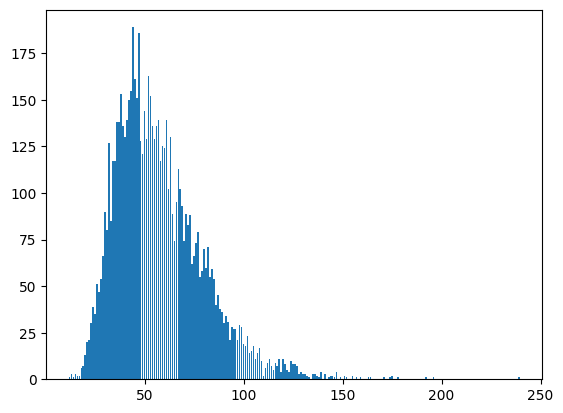

In [59]:
import matplotlib.pyplot as plt

plt.bar([x[0] for x in tuple_list], [x[1] for x in tuple_list])

In [60]:
# calculate the mean and std from tuple_list
import numpy as np

# Extracting word lengths and counts
word_lengths = np.array([x[0] for x in tuple_list])
counts = np.array([x[1] for x in tuple_list])

# Calculate the mean
mean = np.sum(word_lengths * counts) / np.sum(counts)

# Calculate the variance
variance = np.sum(counts * (word_lengths - mean) ** 2) / np.sum(counts)

# Standard deviation is the square root of the variance
std = np.sqrt(variance)

mean, std

(57.59000675219446, 22.301122745100848)

In [61]:
len(
    [
        x
        for x in new_data
        if len(x["ctxs"][0].split()) >= mean - std
        and len(x["ctxs"][0].split()) <= mean + std
    ]
)

5233

In [62]:
new_data = [
    x
    for x in new_data
    if len(x["ctxs"][0].split()) >= mean - std
    and len(x["ctxs"][0].split()) <= mean + std
]

In [63]:
cnt = dict()
for item in new_data:
    ctx = item["ctxs"][0]
    l = len(ctx.split())
    cnt[l] = cnt.get(l, 0) + 1
tuple_list = sorted(cnt.items(), key=lambda x: x[0])

<BarContainer object of 44 artists>

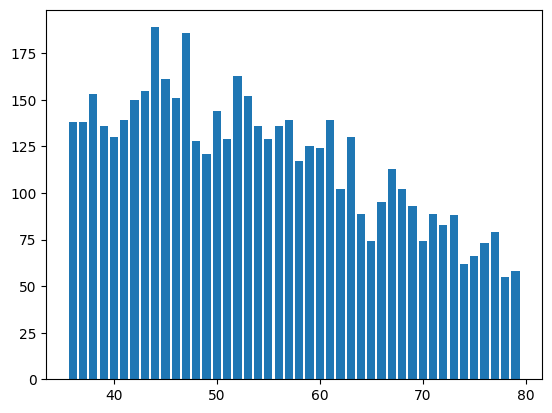

In [64]:
import matplotlib.pyplot as plt

plt.bar([x[0] for x in tuple_list], [x[1] for x in tuple_list])